In [49]:
# -*- coding: UTF-8 -*-
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## 初探数据

In [6]:
data_train = pd.read_csv('train.csv')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 数据初步分析

0    549
1    342
Name: Survived, dtype: int64


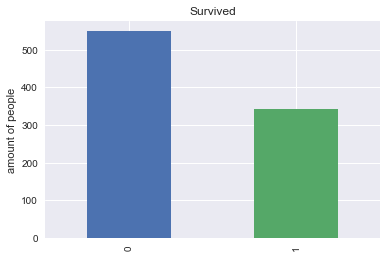

In [27]:
print(data_train.Survived.value_counts())
data_train.Survived.value_counts().plot(kind='bar')
plt.title('Survived') # 标题
plt.ylabel('amount of people')
plt.show()

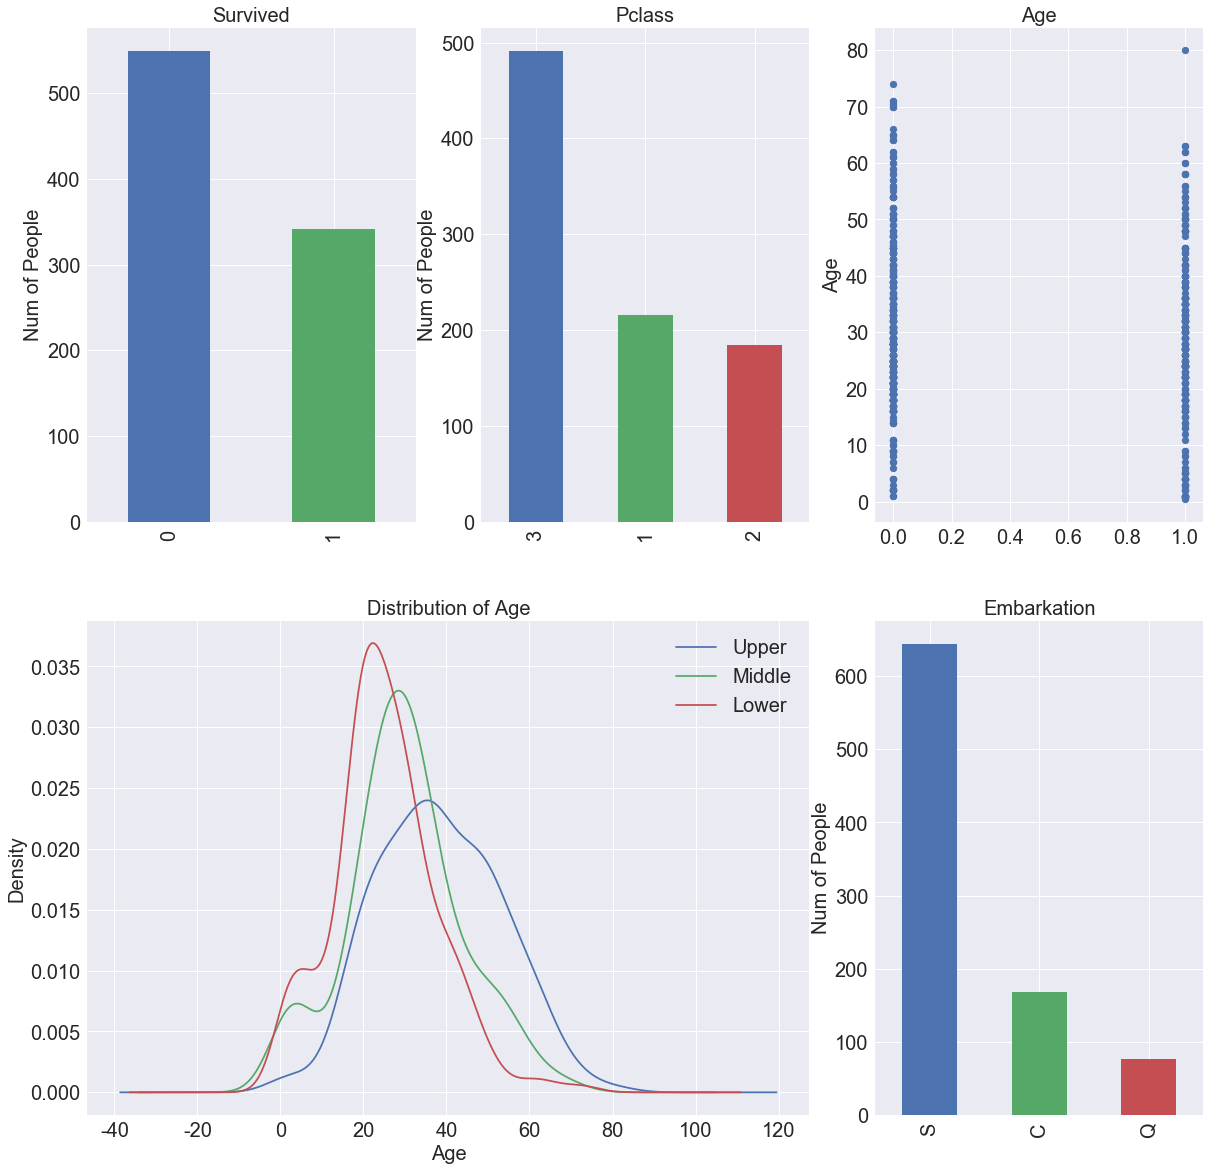

In [61]:
fig = plt.figure(figsize=(20,20))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title('Survived',fontsize=20) # 标题
plt.ylabel("Num of People",fontsize=20)  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.ylabel('Num of People',fontsize=20)
plt.title('Pclass',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel("Age",fontsize=20)                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y') 
plt.title('Age',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel("Age",fontsize=20)# plots an axis lable
plt.ylabel('Density',fontsize=20) 
plt.title('Distribution of Age',fontsize=20)
plt.legend(('Upper', 'Middle','Lower'),loc='best',fontsize=20) # sets our legend for our graph.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title("Embarkation",fontsize=20)
plt.ylabel("Num of People",fontsize=20)  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## 属性与获救人员的关联统计

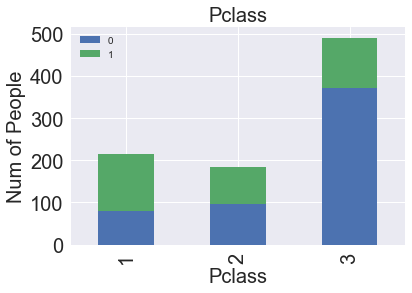

In [67]:
#看看各乘客等级的获救情况
fig = plt.figure(figsize=(20,20),dpi=80)
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df=pd.DataFrame({'1':Survived_1, '0':Survived_0})
df.plot(kind='bar', stacked=True,fontsize=20)
plt.title("Pclass",fontsize=20)
plt.xlabel("Pclass",fontsize=20) 
plt.ylabel("Num of People",fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

## 简单数据预处理